In [65]:
############
# Por: David Alsina, Juan José Caballero, Nicolás Dussan
############

import numpy as np
from matplotlib import pyplot as plt
plt.rc('text', usetex=True)

In [88]:
def pretty_plot(time: np.array,
                theta: np.array,
                w: np.array,
                alpha: np.array,
                L: float):
    
    
    fig, axs = plt.subplots(3, 2, figsize=(15,15), dpi = 300)
    fig.tight_layout()
    fig.tight_layout(pad=3.0)

    axs[0,0].set_title("Posición Angular en funcion del tiempo")
    axs[0,0].set_xlabel("Tiempo $(segundos)$")
    axs[0,0].set_ylabel("Ángulo $(rad)$")
    axs[0,0].plot(time, theta)

    
    
    axs[0,1].set_title("Velocidad Angular en función del tiempo")
    axs[0,1].set_xlabel("Tiempo $(segundos)$")
    axs[0,1].set_ylabel("Velocidad Angular $(rad/s)$")
    axs[0,1].plot(time, w)


    axs[1,0].set_title("Aceleración Angular en función del tiempo")
    axs[1,0].set_xlabel("Tiempo $(segundos)$")
    axs[1,0].set_ylabel("Aceleración Angular $(rad/s^{2})$")
    axs[1,0].plot(time, alpha)

    
    axs[1,1].set_title("Velocidad Angular en función del tiempo y posición")
    axs[1,1].set_xlabel("Tiempo $(segundos)$")
    axs[1,1].set_ylabel("Velocidad Angular $(rad/s)$")
    axs[1,1].plot(time, w*L/3)
    axs[1,1].plot(time, w*2*L/3)
    axs[1,1].plot(time, w*L)   
    axs[1,1].legend(["$r = L/3$", "$r = 2L/3$", "$r = L$"])

    
    axs[2,0].set_title("Aceleración Angular en función del tiempo y posición")
    axs[2,0].set_xlabel("Tiempo $(segundos)$")
    axs[2,0].set_ylabel("Aceleración Angular $(rad/s^{2})$")
    axs[2,0].plot(time, alpha*L/3)
    axs[2,0].plot(time, alpha*2*L/3)
    axs[2,0].plot(time, alpha*L)
    axs[2,0].legend(["$r = L/3$", "$r = 2L/3$", "$r = L$"])

   

    
    plt.show()
    

In [89]:
def euler_cromer_palo_oscilatorio(mass: float, L: float,
                                  theta0: float,
                                  g: float, 
                                  ti: float,
                                  tf: float, delta: float):

    """
    mass:         masa 
    L:            constante de elasticidad
    theta0:       posición angular inicial
    ti:           tiempo inicial
    tf:           tiempo final
    delta:        distancia entre punto y punto de la serie de tiempo 
                  (tiene que ser menor igual a 1)
    """
    
    theta0 = theta0*(np.pi/180)
    I = (1/3)*mass*(L**2)
    
    time = np.arange(ti, tf, delta)
    npoints = time.shape[0]
        
    #posición en angulo
    theta = np.zeros((1, npoints))
    theta[0, 0] = theta0
    
    #velocidad angular
    w = np.zeros((1, npoints))
    w[0, 0] = 0
    
    #velocidad aceleración en x
    alpha = np.zeros((1, npoints))
    alpha[0, 0] =  (-L/2)*( mass * g * np.sin(theta0))/I
    

    
    
    #print(time.shape)
    #print(x.shape)
    #print(vx.shape)
    #print((tf-ti)*npoints)

    
    for sec in range( npoints - 1):
        
        alpha[0, sec] = (-L/2)*( mass * g * np.sin(theta[0, sec]))/I
        
        # w[t + 1]   = w[t] + (delta * aceleracion_angular[t])
        w[0, sec +1] = w[0, sec] + (delta * alpha[0, sec])
        
        theta[0, sec + 1] = theta[0, sec] + (w[0, sec + 1]*delta)
        
        

    #calcula el último punto para los vectores de energías
    alpha[0, npoints-1] = (-L/2)*( mass * g * np.sin(theta[0, npoints-1]))/I
    

        
    return time, theta[0,:], w[0,:], alpha[0,:]  

    

In [90]:
L =  2
time, theta, w, alpha = euler_cromer_palo_oscilatorio(mass = 10,
                                                      L =  L,
                                                      theta0 = 90,
                                                      g = 9.81,
                                                      ti = 1,
                                                      tf = 20,
                                                      delta = 0.1)

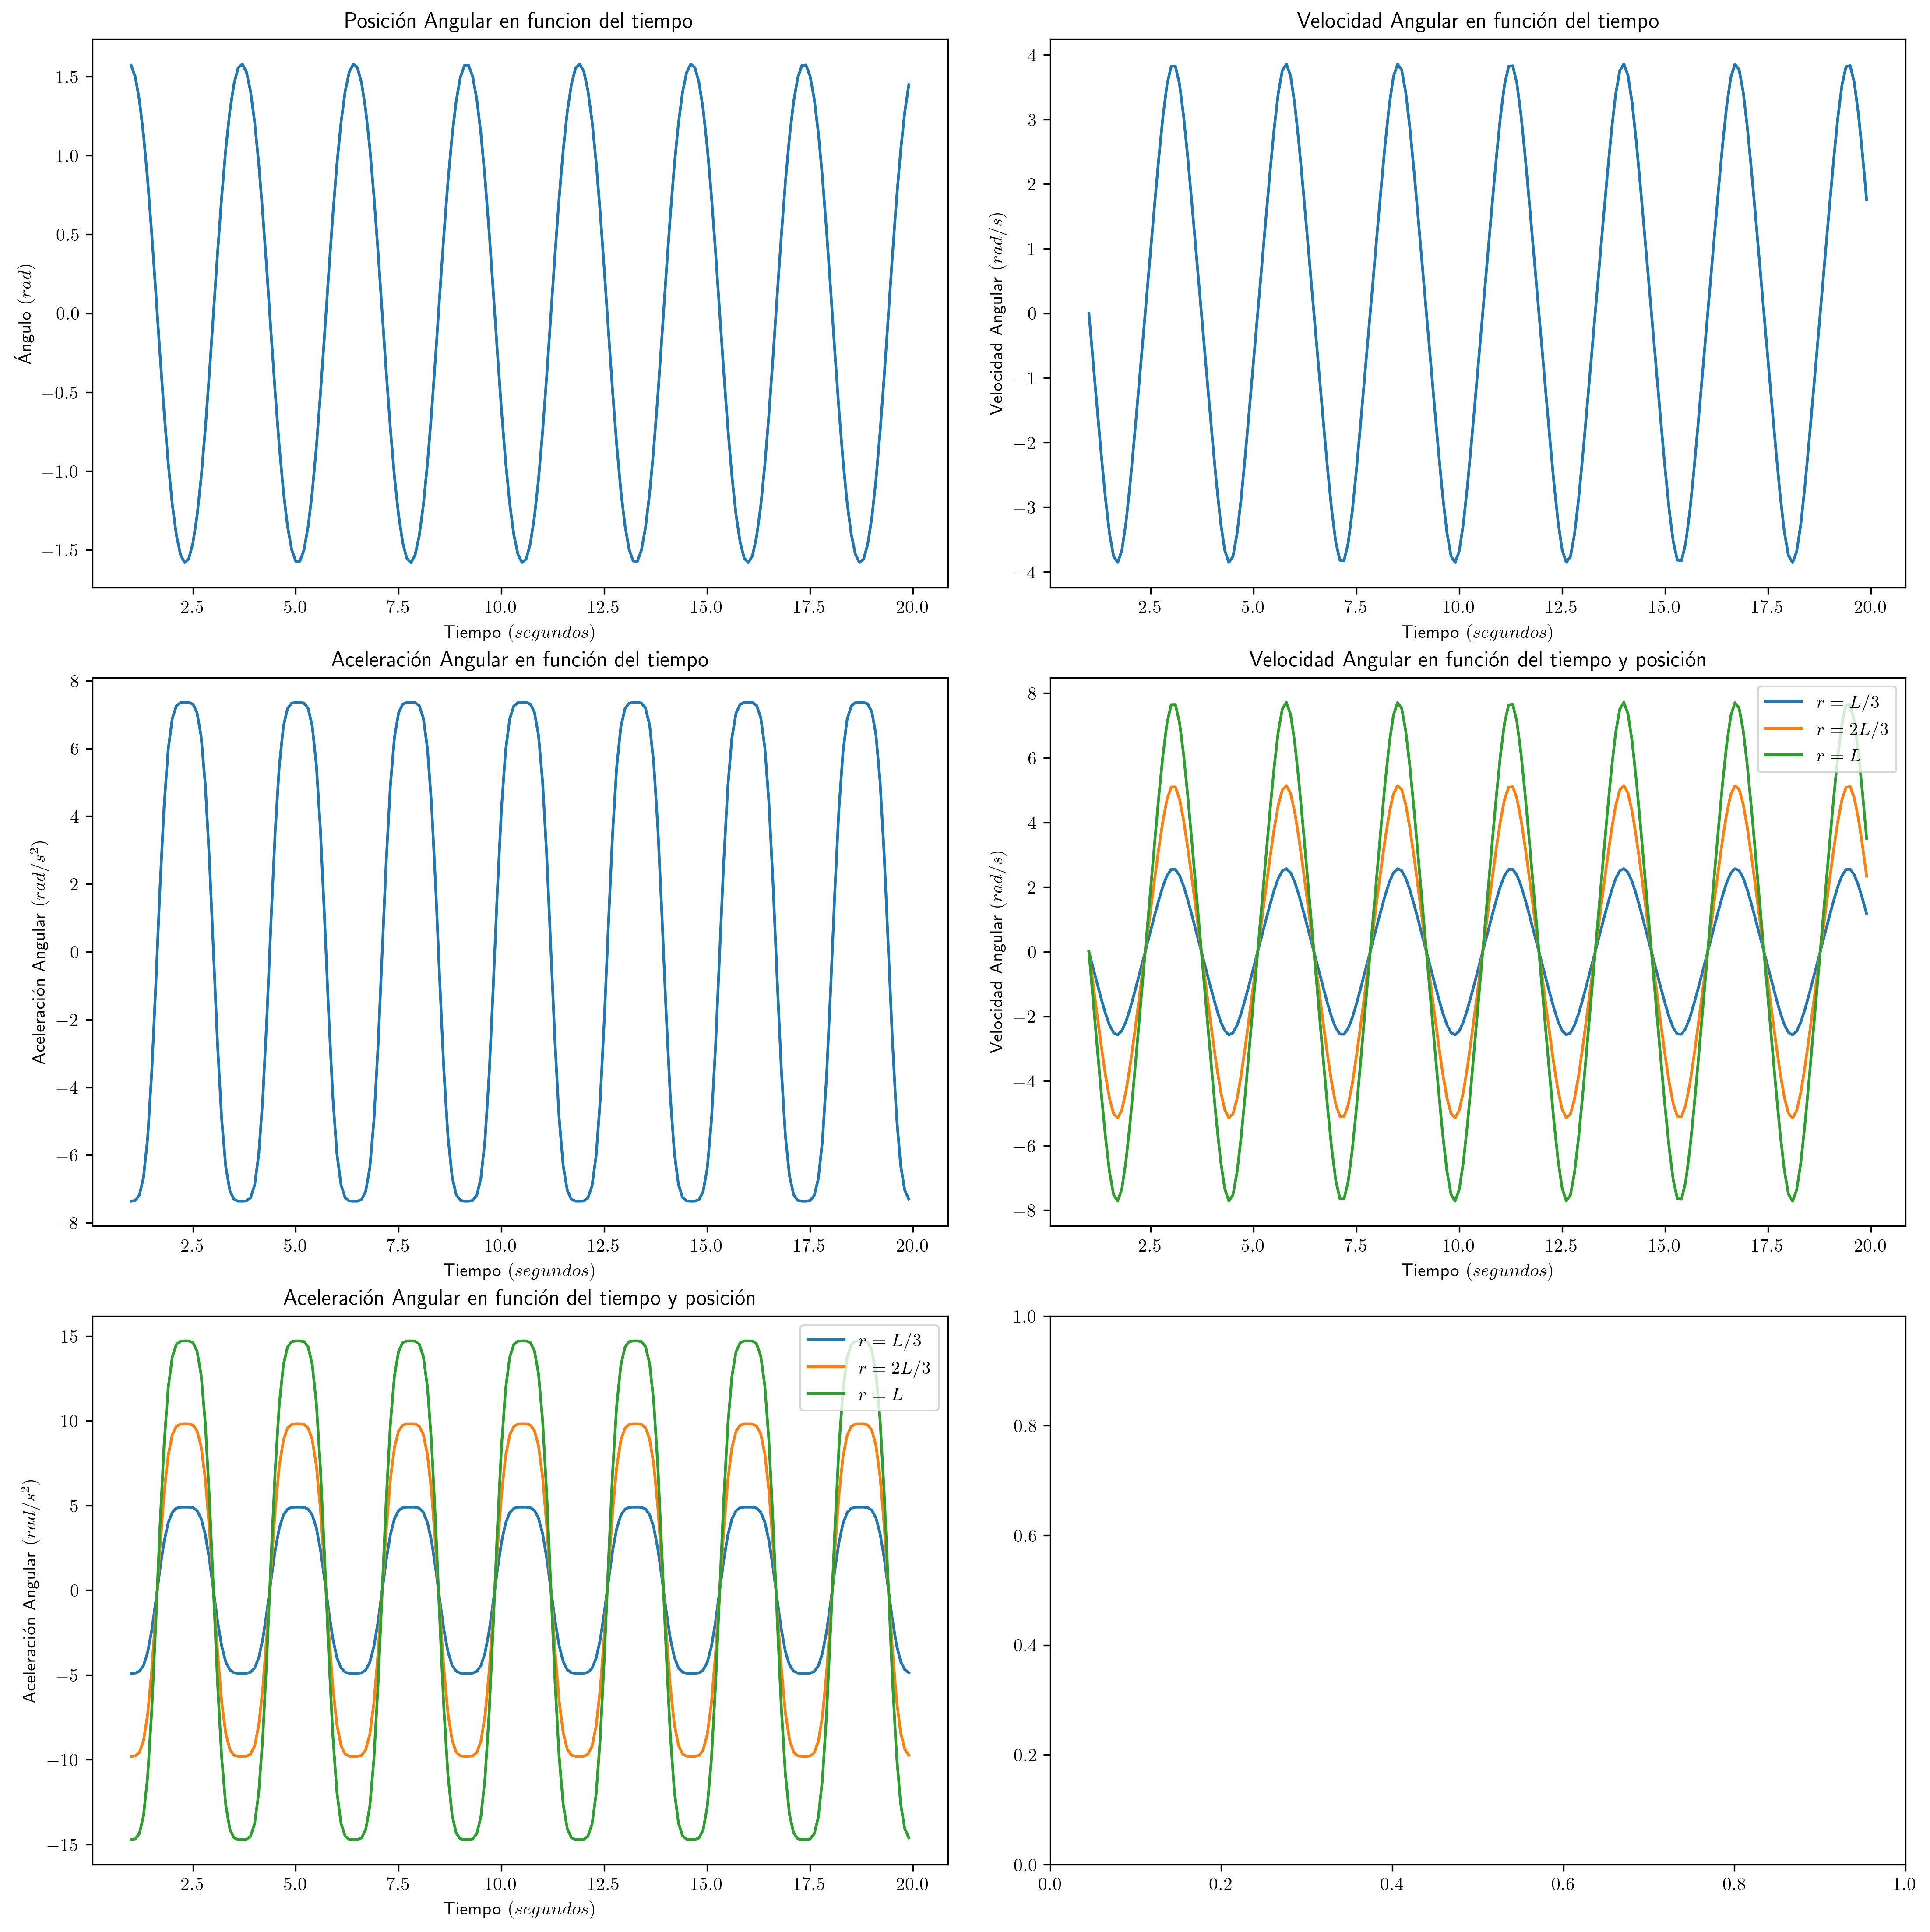

In [91]:
 pretty_plot(time=time,
             theta=theta,
             w = w,
             alpha = alpha,
             L = L)